# **Prediction: House prices in Washington DC**

**Objective** : To predict house prices based on sales data from May, 2014 to May, 2015

* Dataset includes house sale prices for King County in USA. 
* Homes that are sold in the time period: May, 2014 and May, 2015.
* Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

* Columns:

> 1. ida: notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/House
6. sqft_living: square footage of the home
7. sqft_lot: square footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. grade: overall grade given to the housing unit, based on King County grading system
13. sqft_abovesquare: footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) 
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)


In [187]:
#pip install pandas_visual_analysis

# **Import Libraries and Dataset**

In [188]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import joblib

In [189]:
house_sales = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')

In [190]:
house_sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [191]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [192]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# **Data Cleanup and Visualization**

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

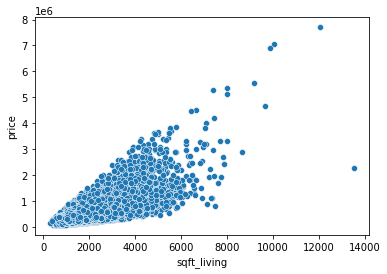

In [193]:
sns.scatterplot(x='sqft_living', y='price', data = house_sales )

<AxesSubplot:xlabel='long', ylabel='lat'>

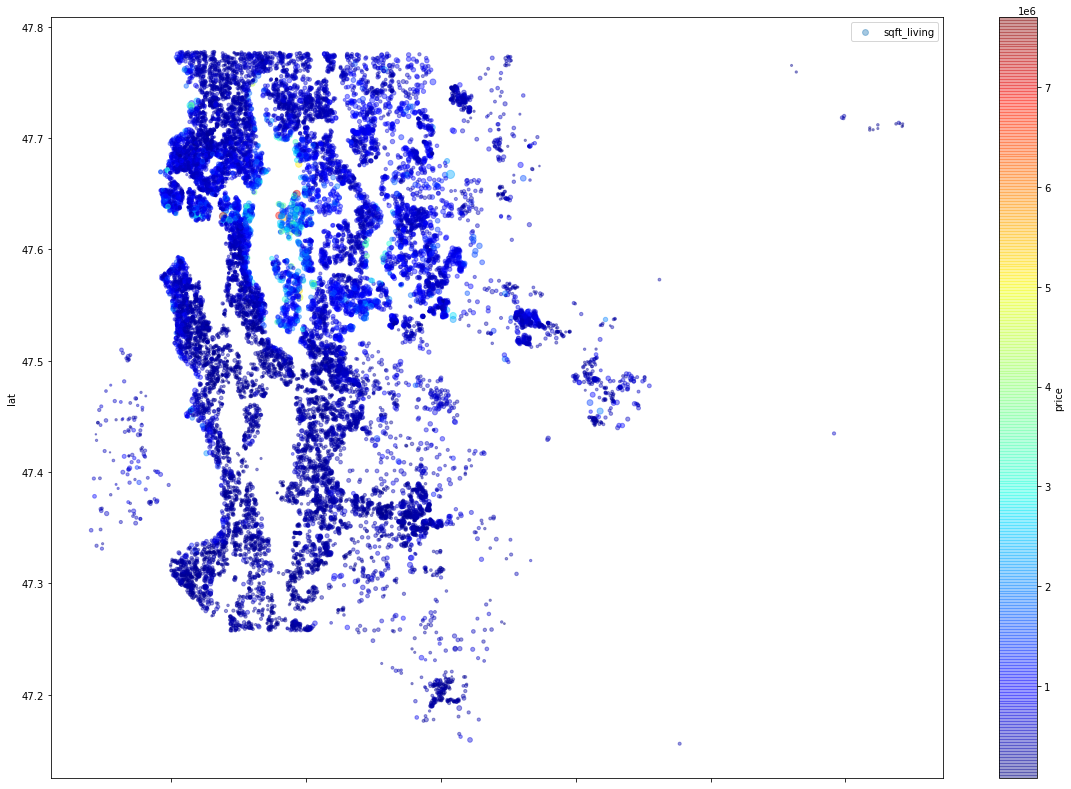

In [194]:
#sns.scatterplot(x='long', y='lat', data = house_sales )
house_sales.plot(kind='scatter', x = 'long', y='lat', alpha = 0.4, s =house_sales['sqft_living']/200, label = 'sqft_living', figsize = (20,14),
                c='price', cmap=plt.get_cmap('jet'), colorbar = True)

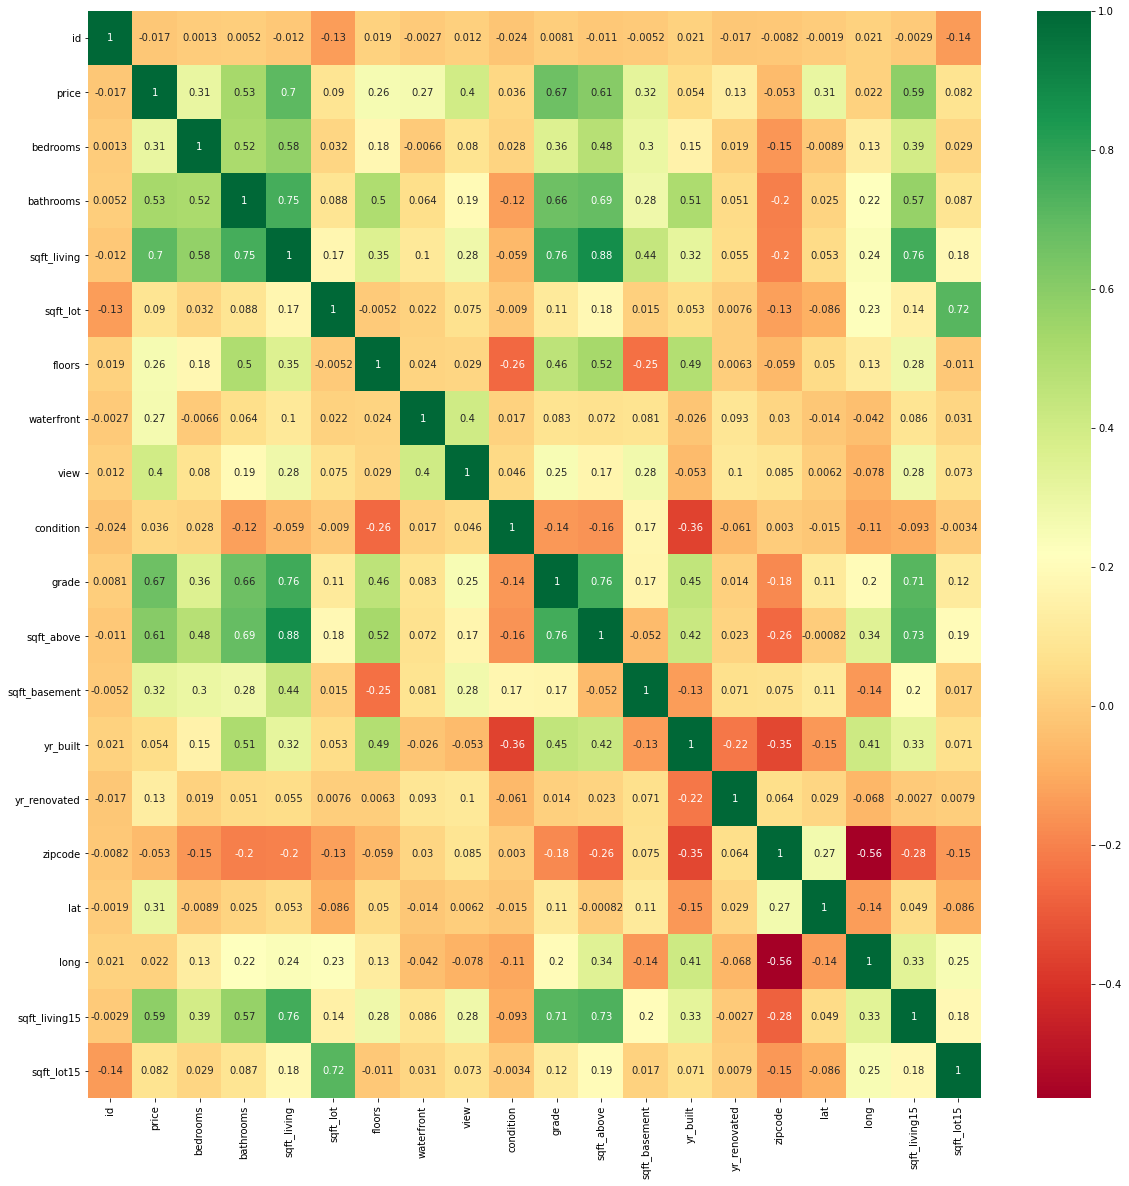

In [208]:
#alternative plot
#f, ax = plt.subplots(figsize = (20, 20))
#sns.heatmap(house_sales.corr(), annot = True)

corrmat=house_sales.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(house_sales[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [209]:
house_high = house_sales[house_sales['price']>= 650000]
house_high

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
26,1794500383,20140626T000000,937000.0,3,1.75,2450,2691,2.0,0,0,...,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,7502800100,20140813T000000,679950.0,5,2.75,3600,9437,2.0,0,0,...,9,3600,0,2014,0,98059,47.4822,-122.131,3550,9421
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125
21599,7202300110,20140915T000000,810000.0,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21600,249000205,20141015T000000,1537000.0,5,3.75,4470,8088,2.0,0,0,...,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964


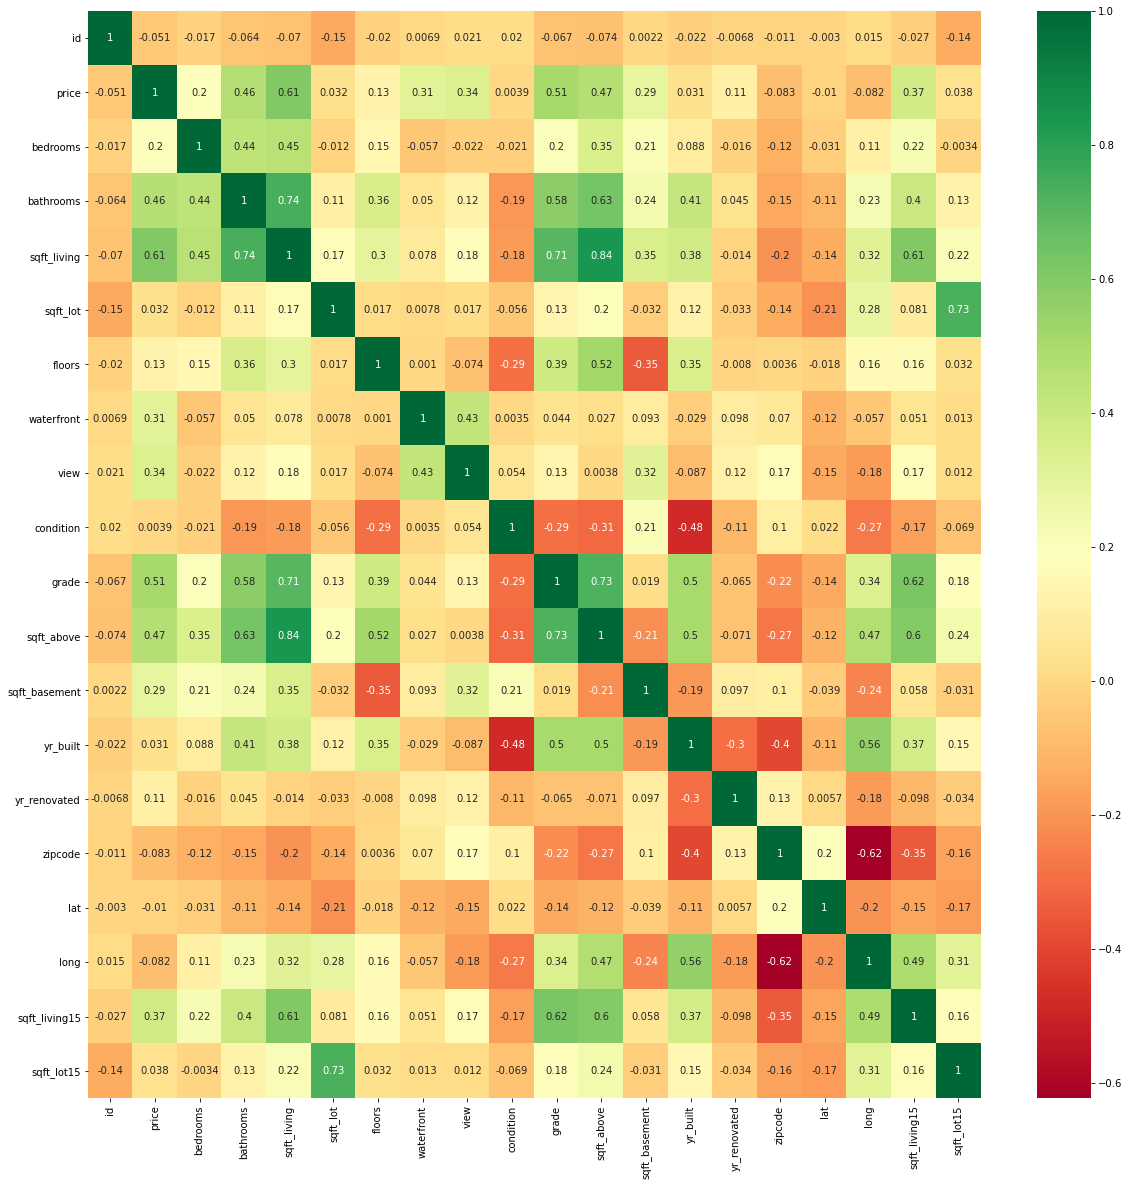

In [210]:
corrmat1=house_high.corr() 
top_corr_features1=corrmat1.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(house_high[top_corr_features1].corr(),annot=True,cmap="RdYlGn")

## Feature importance for Prices >= $650k


In [211]:
#Using dataset for high prices
yh = house_high['price']
yh

5        1225000.0
10        662500.0
15        650000.0
21       2000000.0
26        937000.0
           ...    
21596     679950.0
21597    1575000.0
21599     810000.0
21600    1537000.0
21606    1007500.0
Name: price, Length: 5324, dtype: float64

In [212]:
xh = house_high.drop(['price','date'], axis=1)
xh.shape

(5324, 19)

In [213]:
from sklearn.ensemble import ExtraTreesRegressor
#import matplotlib.pyplot as plt
model_h = ExtraTreesRegressor()
model_h.fit(xh,yh)

ExtraTreesRegressor()

In [214]:
print(model_h.feature_importances_)

[0.01658821 0.01188277 0.04511514 0.22374408 0.01791066 0.01113142
 0.08441782 0.02690035 0.01250388 0.18755343 0.05742466 0.01843088
 0.04153918 0.00962558 0.03033979 0.04501605 0.10137944 0.04187885
 0.01661783]


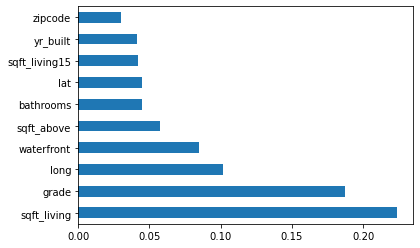

In [215]:
#plot graph of feature importances for better visualization
#Factors responsible for higher property value - >= $650k price 

feat_importances = pd.Series(model_h.feature_importances_, index=xh.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

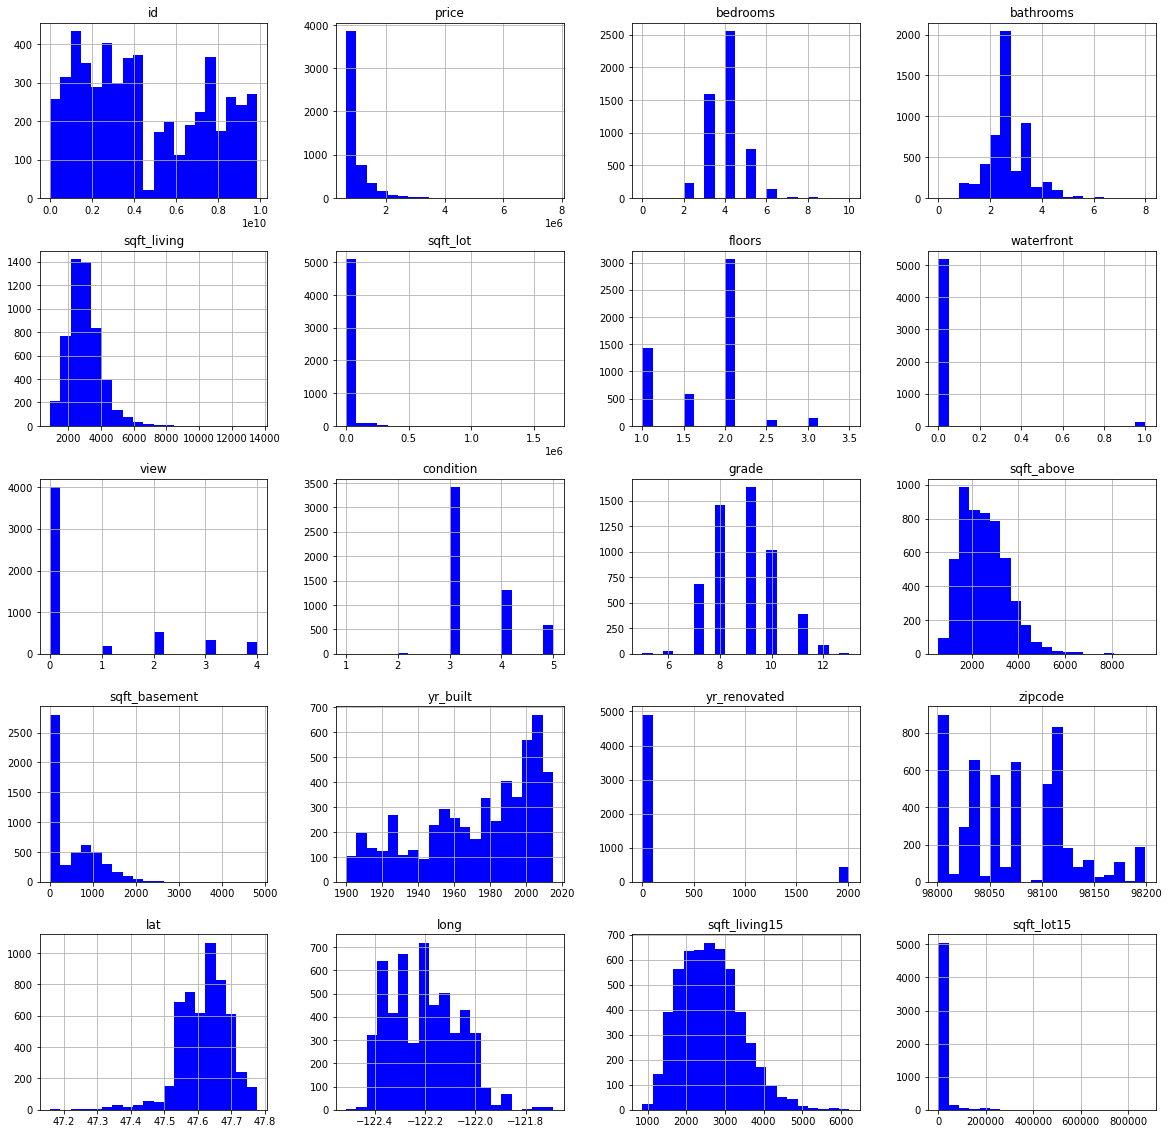

In [216]:
house_high.hist(bins=20, figsize = (20,20), color = 'b')

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

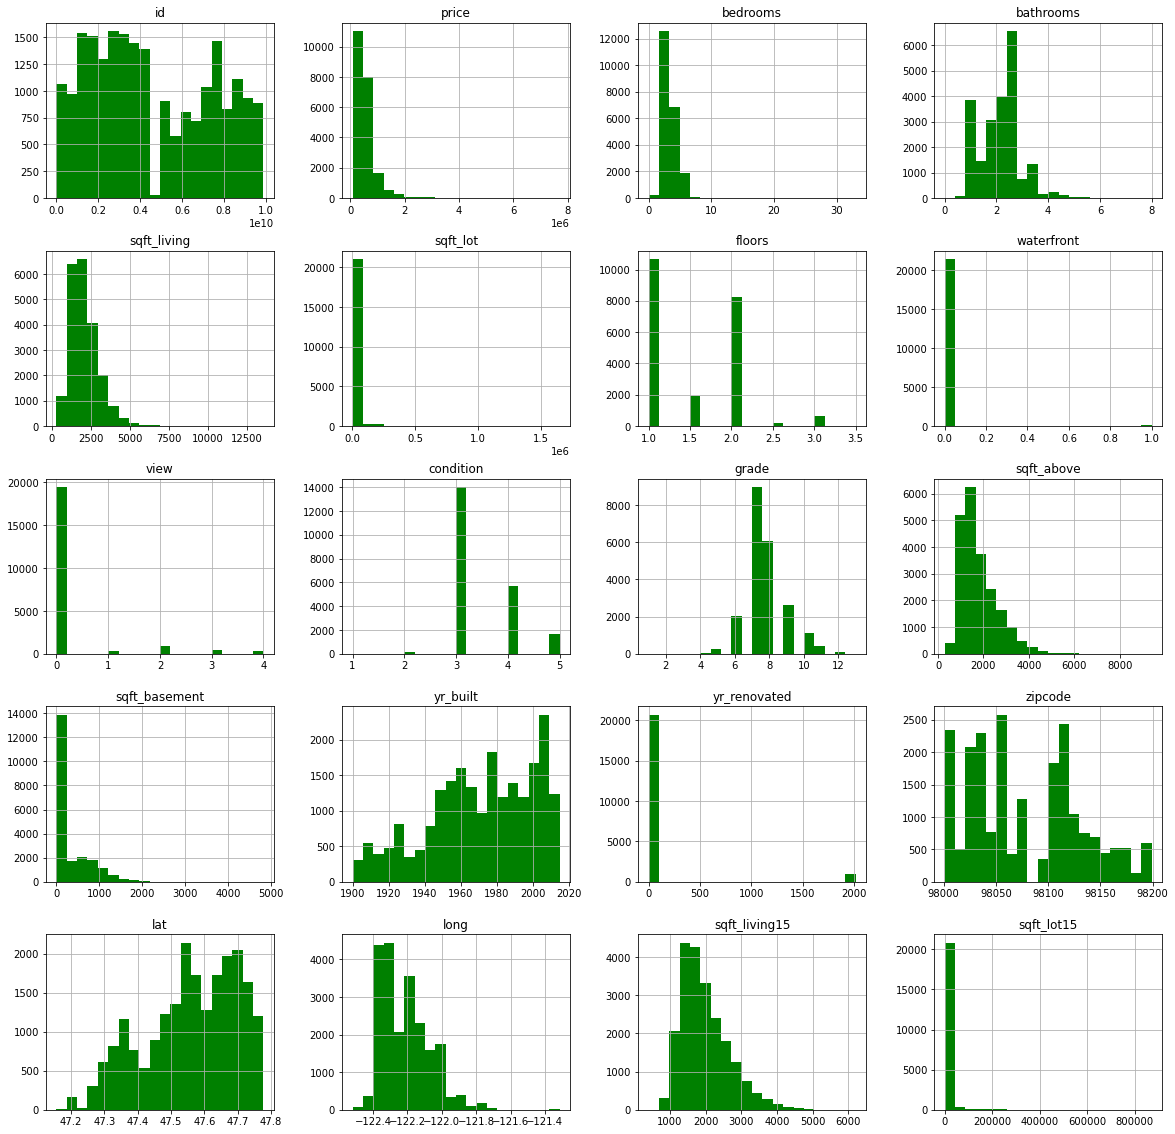

In [217]:
house_sales.hist(bins=20, figsize = (20,20), color = 'g')

In [218]:
#Data Cleaning 
y = house_sales['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [219]:
y.shape

(21613,)

In [220]:
#X = house_sales[['bedrooms', 'bathrooms', 'waterfront', 'grade', 'sqft_above', 'sqft_living', 'lat', 'long', 'sqft_living15']]
X = house_sales.drop(['price', 'date', 'id', 'view'], axis=1)

X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# First Model - Random Forest Regressor

In [221]:
### Feature Importance categorisation 

from sklearn.ensemble import ExtraTreesRegressor
#import matplotlib.pyplot as plt
model_01 = ExtraTreesRegressor()
model_01.fit(X,y)

ExtraTreesRegressor()

In [222]:
# feature Importance

print(model_01.feature_importances_)

[0.00812479 0.04344421 0.21737458 0.01321894 0.00802996 0.04964714
 0.01031226 0.22776586 0.05913354 0.01475633 0.03648214 0.006383
 0.02005685 0.14108314 0.05196135 0.08001999 0.01220591]


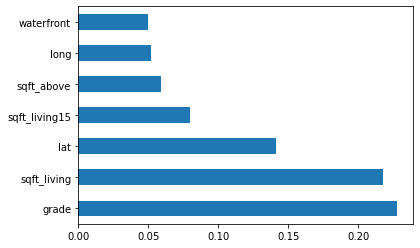

In [223]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model_01.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

### **'Grade' and 'Sqft_living' seem to be the most important features**

In [224]:
#We choose input features with reasonable correlation coefficients to price
#x = house_sales[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]
#x

### Split data into training and testing dataset using the Stratified Shuffle split based on the 'sqft_living' input

In [225]:
#Join the clean input features X and the output y1 in a dataframe
final_house = pd.concat([X, y], axis=1)
final_house.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [226]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [227]:
#prepare data by distributing it 
final_house["sqft_living_cut"] = pd.cut( house_sales["sqft_living"], 
                                bins =[ 0, 1000, 2000, 3000, 4000, np.inf], 
                                labels =[ 1, 2, 3, 4, 5])

<AxesSubplot:>

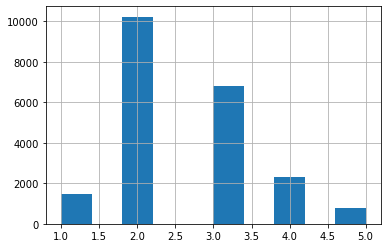

In [228]:
final_house['sqft_living_cut'].hist()

In [229]:
#split data using Stratified shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 2)
for train_index, test_index in split.split(final_house, final_house['sqft_living_cut']):
    train_set = final_house.loc[train_index]
    test_set = final_house.loc[test_index]

In [230]:
final_house = final_house.drop(['sqft_living_cut'], axis=1)

In [231]:
train_set.shape, test_set.shape

((17290, 19), (4323, 19))

In [232]:
train_set.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sqft_living_cut
12652,3,2.50,2490,4244,2.0,0,3,9,2490,0,2005,0,98042,47.3705,-122.131,2490,4748,370000.0,3
4580,3,3.00,3740,39640,2.0,0,3,10,3740,0,1991,0,98070,47.4036,-122.462,2930,26136,789000.0,4
18560,2,2.25,1100,1114,2.0,0,3,8,900,200,2009,0,98122,47.6199,-122.304,1230,1800,574000.0,2
2803,3,1.00,1280,2580,1.5,0,3,8,1280,0,1910,2014,98115,47.6727,-122.320,1410,3150,478000.0,2
19559,3,1.00,900,4084,1.5,0,3,7,900,0,1910,0,98117,47.6840,-122.393,1280,4080,400000.0,1


In [233]:
X_train = train_set.iloc[:,:-2]
y_train = train_set.iloc[:,-2]

X_test = test_set.iloc[:,:-2]
y_test = test_set.iloc[:,-2]

In [234]:
X_train.shape, y_train.shape

((17290, 17), (17290,))

In [235]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12652,3,2.50,2490,4244,2.0,0,3,9,2490,0,2005,0,98042,47.3705,-122.131,2490,4748
4580,3,3.00,3740,39640,2.0,0,3,10,3740,0,1991,0,98070,47.4036,-122.462,2930,26136
18560,2,2.25,1100,1114,2.0,0,3,8,900,200,2009,0,98122,47.6199,-122.304,1230,1800
2803,3,1.00,1280,2580,1.5,0,3,8,1280,0,1910,2014,98115,47.6727,-122.320,1410,3150
19559,3,1.00,900,4084,1.5,0,3,7,900,0,1910,0,98117,47.6840,-122.393,1280,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,3,1.75,1450,61419,1.0,0,4,8,1450,0,1976,0,98092,47.3343,-122.160,2256,82328
17325,3,1.75,2050,5160,1.5,0,4,8,1300,750,1926,0,98112,47.6374,-122.304,2220,5960
382,4,2.25,2130,5337,2.0,0,3,7,2130,0,2001,0,98019,47.7237,-121.959,2300,6930
19079,2,1.00,1220,10170,1.0,0,3,7,980,240,1948,0,98125,47.7297,-122.327,1990,9064


In [236]:
y_train.head()

12652    370000.0
4580     789000.0
18560    574000.0
2803     478000.0
19559    400000.0
Name: price, dtype: float64

In [237]:
from sklearn.ensemble import RandomForestRegressor

In [238]:
from sklearn.model_selection import RandomizedSearchCV

In [239]:
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1500, num = 13)]
print(n_estimators)

[300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]


In [240]:
##Hyperparameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1500, num = 13)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [241]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


print(random_grid)

{'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [242]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_model01 = RandomForestRegressor()

In [243]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_model01, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [244]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  16.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  11.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  10.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  10.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  11.0s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total= 1.3min
[CV] n_estimators=1000, min_samples_split=10

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total=  59.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total=  57.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total=  55.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total= 1.0min
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=15, total= 1.0min
[CV] n_estimators=800, min_samples_split=2,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 54.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [300, 400, 500, 600,
                                                         700, 800, 900, 1000,
                                                         1100, 1200, 1300, 1400,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [245]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [246]:
rf_random.best_score_

-17306600847.62141

In [247]:
predictions=rf_random.predict(X_test)

C:\Users\TosinOja\anaconda3\envs\ml_house\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

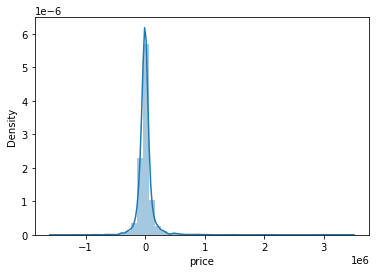

In [248]:
sns.distplot(y_test-predictions)

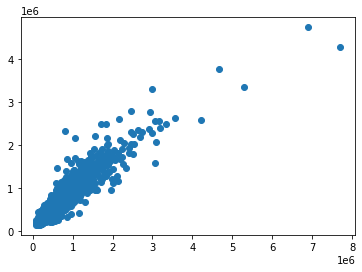

In [249]:
plt.scatter(y_test,predictions)

In [250]:
#Model Evaluation

k = X_test.shape[1]
n = len(X_test)
n, k

(4323, 17)

In [251]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 142112.876 
MSE = 20196069663.954304 
MAE = 70646.26202440202 
R2 = 0.8673318384230823 
Adjusted R2 = 0.866807945566681


**Good model with 86% accuracy to predict house prices from historical data.**

In [252]:
#import pickle
# open a file, where you ant to store the data
#file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
#pickle.dump(rf_random, file)

In [253]:
#joblib.dump(rf_random, "random_forest_regression_model.joblib", compress = 9)

['random_forest_regression_model.joblib']

# Second Model - Artificial Neural Network

In [254]:
#Normalise the inputs 'X' and output 'y' for training and testing data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_tr = scaler.fit_transform(X_train)
X_te = scaler.fit_transform(X_test)



In [255]:
X_tr

array([[0.09090909, 0.3125    , 0.15841584, ..., 0.32225914, 0.3598348 ,
        0.00469708],
       [0.09090909, 0.375     , 0.25361767, ..., 0.04734219, 0.43555326,
        0.02926571],
       [0.06060606, 0.28125   , 0.05255141, ..., 0.17857143, 0.14300465,
        0.00131068],
       ...,
       [0.12121212, 0.28125   , 0.13099772, ..., 0.46511628, 0.32713819,
        0.00720357],
       [0.06060606, 0.125     , 0.06169078, ..., 0.15946844, 0.27379109,
        0.00965492],
       [0.12121212, 0.3125    , 0.16984006, ..., 0.41445183, 0.35467217,
        0.00406759]])

In [256]:
X_te

array([[0.42857143, 0.28125   , 0.10195578, ..., 0.25146689, 0.16712871,
        0.0050573 ],
       [0.28571429, 0.21875   , 0.05612245, ..., 0.21123219, 0.16237624,
        0.02768691],
       [0.28571429, 0.125     , 0.04421769, ..., 0.10058676, 0.03168317,
        0.01037583],
       ...,
       [0.42857143, 0.125     , 0.13095238, ..., 0.18943839, 0.18415842,
        0.01732285],
       [0.42857143, 0.1875    , 0.06462585, ..., 0.18776194, 0.2039604 ,
        0.01117596],
       [0.42857143, 0.28125   , 0.10119048, ..., 0.49203688, 0.1960396 ,
        0.41363754]])

In [257]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

y_tr = scaler.fit_transform(y_train)
y_te = scaler.fit_transform(y_test)

In [258]:
y_tr

array([[0.04221825],
       [0.10218247],
       [0.07141324],
       ...,
       [0.04493739],
       [0.05266547],
       [0.07084079]])

In [259]:
scaler.data_max_

array([7700000.])

In [260]:
X_tr.shape, X_te.shape, y_tr.shape

((17290, 17), (4323, 17), (17290, 1))

In [261]:
y_tr.shape, y_te.shape

((17290, 1), (4323, 1))

# Create Model

In [262]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=200, activation='relu', input_shape=(17, )))
model.add(tf.keras.layers.Dense(units=150, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [263]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               3600      
_________________________________________________________________
dense_14 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 53,951
Trainable params: 53,951
Non-trainable params: 0
_________________________________________________________________


In [264]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [265]:
epochs_hist = model.fit(X_tr, y_tr, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 13832 samples, validate on 3458 samples
Epoch 1/100
13832/13832 [==============================] - 35s 3ms/sample - loss: 9.7833e-04 - val_loss: 5.7577e-04
Epoch 2/100
13832/13832 [==============================] - 2s 112us/sample - loss: 5.8834e-04 - val_loss: 4.9778e-04
Epoch 3/100
13832/13832 [==============================] - 1s 106us/sample - loss: 5.4170e-04 - val_loss: 4.9642e-04
Epoch 4/100
13832/13832 [==============================] - 1s 106us/sample - loss: 4.9047e-04 - val_loss: 4.0782e-04
Epoch 5/100
13832/13832 [==============================] - 2s 110us/sample - loss: 4.6685e-04 - val_loss: 4.3024e-04
Epoch 6/100
13832/13832 [==============================] - 1s 102us/sample - loss: 4.6252e-04 - val_loss: 3.8411e-04
Epoch 7/100
13832/13832 [==============================] - 1s 107us/sample - loss: 4.2338e-04 - val_loss: 4.0005e-04
Epoch 8/100
13832/13832 [==============================] - 2s 116us/sample - loss: 4.0215e-04 - val_loss: 3.6341e-04
Epoch 9/100
1383

#**Evaluate the Model**

In [266]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

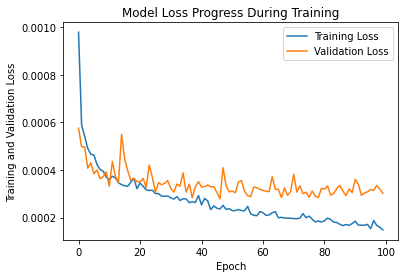

In [267]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [268]:
# Try predict using inputs values
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
#X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

#scaler_1 = MinMaxScaler()
#X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

#y_predict_1 = model.predict(X_test_scaled_1)

#y_predict_1 = scaler.inverse_transform(y_predict_1)
#y_predict_1

Text(0, 0.5, 'True Values')

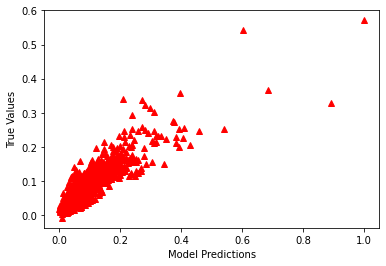

In [269]:
# 
y_predict = model.predict(X_te)
plt.plot(y_te, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [270]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_te)

(0.0, 3000000.0)

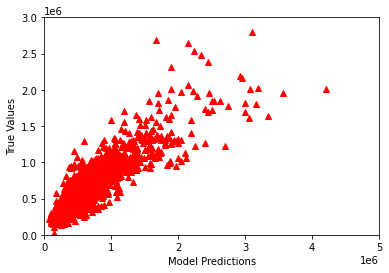

In [271]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)


In [272]:
k = X_te.shape[1]
n = len(X_te)

n, k

(4323, 17)

In [273]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 182293.38 
MSE = 33230876491.62213 
MAE = 95624.4571256759 
R2 = 0.7817060762272138 
Adjusted R2 = 0.7808440560868799


# **Try a wider range of inputs split**

In [294]:
Xa = house_sales.drop(['price', 'date', 'id', 'view'], axis=1)
#X= house_sales[['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_basement', 'waterfront', 'condition', 'grade', 'sqft_above', 'yr_built', 
#'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [295]:
Xa

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [296]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit(Xa)

In [297]:
joblib.dump(scaler, 'scaler_x.gz')

['scaler_x.gz']

In [298]:
X_scaled = scaler.fit_transform(Xa)

In [299]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [300]:
Y= house_sales['price']

In [301]:
Y = Y.values.reshape(-1,1)
Y_scale = scaler.fit(Y)

In [302]:
joblib.dump(scaler, 'scaler_y.gz')

['scaler_y.gz']

In [303]:
Y_scaled = scaler.fit_transform(Y)

In [304]:
Y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.25)

In [306]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=200, activation='relu', input_shape=(17, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [307]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [308]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.20)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 3s 220us/sample - loss: 7.9350e-04 - val_loss: 4.3033e-04
Epoch 2/100
12967/12967 [==============================] - 1s 96us/sample - loss: 5.3608e-04 - val_loss: 4.1041e-04
Epoch 3/100
12967/12967 [==============================] - 1s 102us/sample - loss: 4.6108e-04 - val_loss: 3.2355e-04
Epoch 4/100
12967/12967 [==============================] - 1s 93us/sample - loss: 3.9152e-04 - val_loss: 3.5202e-04
Epoch 5/100
12967/12967 [==============================] - 1s 92us/sample - loss: 3.8966e-04 - val_loss: 3.5403e-04
Epoch 6/100
12967/12967 [==============================] - 1s 93us/sample - loss: 3.7488e-04 - val_loss: 3.1444e-04
Epoch 7/100
12967/12967 [==============================] - 1s 93us/sample - loss: 3.5199e-04 - val_loss: 3.2372e-04
Epoch 8/100
12967/12967 [==============================] - 1s 94us/sample - loss: 3.5290e-04 - val_loss: 2.7810e-04
Epoch 9/100
12967/129

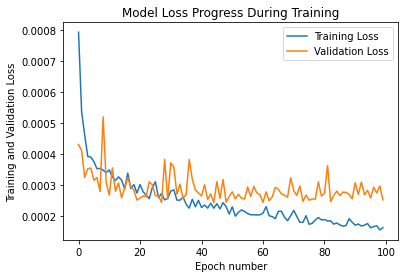

In [309]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

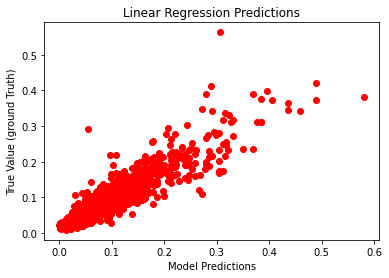

In [310]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "o", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [311]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


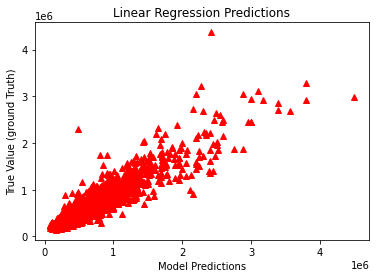

In [312]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [313]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 126164.708 
MSE = 15917533623.564737 
MAE = 70716.6958474047 
R2 = 0.8718071598461784 
Adjusted R2 = 0.871300939571471


**Good model with 88% accuracy to predict house prices from historical data.**

In [314]:
from tensorflow.keras.models import load_model

In [317]:
tf.keras.models.save_model(model,'ann_model.h5')

In [ ]:
#10, 5492885819312364962500198509825047.5601-122.089835003700

#predann 1322184960.0
#predrf 2182392.88

In [ ]:
#file = open('ANN_model.pkl', 'wb')

# dump information to that file
#pickle.dump(model, file)